In [1]:
!pip install -U pysr

In [2]:
import pysr

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pysr import PySRRegressor

In [4]:
n_samples = 100

# Один датасет

## Хороший запуск

In [25]:
X, y = make_circles(n_samples=int(n_samples), noise=0.1, factor=0.4, random_state=42)

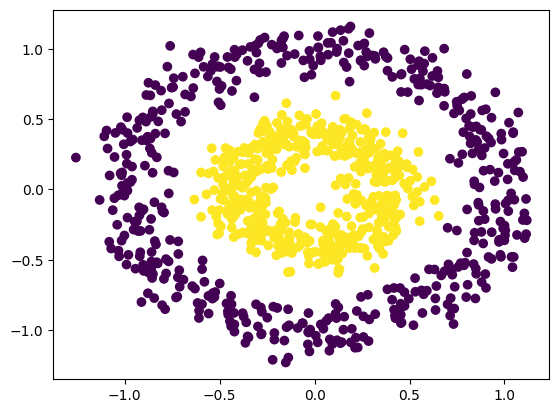

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [28]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
'''
1. [Done] В лосс надо вместо MSE сделать accuracy
2. Может надо что-то сделать с complexity, чтобы выйти на rbf, а не формулу круга?
'''
model = PySRRegressor(
    niterations=100,
    populations=31,
    population_size=27,
    ncycles_per_iteration=380,
    binary_operators=["+", "*"],
    unary_operators=["exp"],
    elementwise_loss="f(x, y) = abs(x - y)",
    # complexity_of_constants=2,
    maxsize=10,
    progress=True,
    # precision=32,
    model_selection="best"
)

In [46]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2766: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 6.830e+04
Progress: 362 / 3100 total iterations (11.677%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           5.000e-01  1.594e+01  y = 0.011032
5           4.853e-01  7.440e-03  y = exp(-0.3207 * exp(x₀))
6           2.835e-01  5.377e-01  y = exp((x₁ * -3.8832) * x₁)
8           2.783e-01  9.271e-03  y = exp(((x₁ * -4.0807) * x₁) + 0.069553)
9           2.662e-01  4.420e-02  y = exp((exp(x₁ * x₁) * -3.0745) + 3.1312)
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 6.770e+04
Progress: 709 / 3100 total iterations (22

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick     score                                         equation      loss  \
	0        0.000000                                      0.011032103  0.500000   
	1        0.007442                       exp(exp(x0) * -0.32703066)  0.485335   
	2  >>>>  0.537726                         exp(x1 * (x1 * -3.8849))  0.283472   
	3        0.009271        exp(((x1 * x1) * -4.081576) + 0.06958601)  0.278264   
	4        0.373530  exp(exp((x1 * 42.914463) * x1) * -1.9883651e-5)  0.191530   
	
	   complexity  
	0           1  
	1           5  
	2           6  
	3           8  
	4           9  
]

  - outputs/20250206_072322_aZzH8d/hall_of_fame.csv


In [47]:
model.sympy()

exp(x1*x1*(-3.8849))

In [48]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy: {accuracy:.4f}")


Test accuracy: 0.7700


## Очень хороший запуск

In [77]:
X, y = make_circles(n_samples=int(n_samples), noise=0.1, factor=0.4, random_state=42)

In [78]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
model = PySRRegressor(
    niterations=200,
    populations=31,
    population_size=27,
    ncycles_per_iteration=380,
    binary_operators=["+", "*"],
    unary_operators=["exp"],
    elementwise_loss="f(x, y) = abs(x - y)",
    # complexity_of_constants=2,
    maxsize=15,
    progress=True,
    # precision=32,
    model_selection="best"
)

In [80]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2766: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 4.020e+04
Progress: 191 / 6200 total iterations (3.081%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           5.000e-01  1.594e+01  y = 0.07933
5           4.853e-01  7.442e-03  y = exp(exp(x₀) * -0.32701)
6           2.835e-01  5.377e-01  y = exp((x₁ * x₁) * -3.8831)
8           2.783e-01  9.271e-03  y = exp((x₁ * (x₁ * -4.079)) + 0.069528)
10          2.136e-01  1.321e-01  y = exp(((x₀ * x₀) + (x₁ * x₁)) * -2.1565)
12          2.064e-01  1.718e-02  y = exp(((-0.011543 + (x₀ * x₀)) + (x₁ * x₁)) * -2.1565)
15          1.415e-01  1.260e-01  y = exp((((x₁ * x₁) + (x₀ * x₀)) * -3.218) + (exp(x₀) * 0....
                                      39171))
───────────────────────────────────────────────────────────────────────────────────────────────────
════════

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                         0.07933044   
	1        0.007442                         exp(exp(x0) * -0.32669514)   
	2        0.537726                         exp((x1 * -3.881549) * x1)   
	3        0.009271        exp(((x1 * -4.0806103) * x1) + 0.069524094)   
	4        0.381147     exp(exp((x1 * 58.185043) * x1) * -4.473318e-7)   
	5        0.165911           exp((x0 * ((x1 * x1) * -35.15966)) * x0)   
	6        0.286333  (((x0 * x0) + (x1 * x1)) * -1.0710877) + 1.158593   
	7        1.085119  exp(exp(((x1 * x1) + (x0 * x0)) * 10.802) * -0...   
	8  >>>>  4.055764  exp(exp(((x0 * x0) + ((x1 * x1) + -0.52902055)...   
	
	       loss  complexity  
	0  0.500000           1  
	1  0.485335           5  
	2  0.283472           6  
	3  0.278264           8  
	4  0.190076           9  
	5  0.161018          10  
	6  0.120926          11  
	7  0.013804          13  
	8  0.000004          15  
]

  - outputs/20250206_074435_qq6Kvy/hall_of_fame.csv


In [81]:
model.sympy()

exp(exp((x0*x0 + x1*x1 - 0.52902055)*79.52242)*(-0.92666394))

In [82]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)

In [83]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy: {accuracy:.4f}")


Test accuracy: 1.0000


# Multitask

In [10]:
n_datasets = 5

In [16]:
train_datasets, valid_datasets = [], []
for i in range(n_datasets):
  X, y = make_circles(n_samples=n_samples, noise=0.1, factor=0.4)

  if i % 5 == 1:
    X[:, 0] += 2 * i
    X[:, 1] += 2 * i

  elif i % 5 == 2:
    X[:, 0] += 2 * i
    X[:, 1] -= 2 * i

  elif i % 5 == 3:
    X[:, 0] -= 2 * i
    X[:, 1] -= 2 * i

  elif i % 5 == 4:
    X[:, 0] -= 2 * i
    X[:, 1] += 2 * i

  dataset = np.hstack([X, y[:, np.newaxis]])

  train_datasets.append(dataset[: int(0.7 * len(dataset))])
  valid_datasets.append(dataset[int(0.7 * len(dataset)) :])

In [17]:
model = PySRRegressor(
    niterations=200,
    populations=30,
    population_size=30,
    ncycles_per_iteration=380,
    binary_operators=["+", "*"],
    unary_operators=["exp"],
    elementwise_loss="f(x, y) = abs(x - y)",
    # complexity_of_constants=2,
    maxsize=15,
    progress=False,
    # precision=32,
    model_selection="best"
)

In [18]:
for train in train_datasets:
  # print(train[:, :2].shape, train[:, 2])
  model.fit(train[:, :2], train[:, 2])
  print(model.sympy())

[ Info: Started!



Expressions evaluated per second: 1.020e+05
Progress: 581 / 6000 total iterations (9.683%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           4.857e-01  1.594e+01  y = 1.4437e-07
5           4.758e-01  5.143e-03  y = (x₁ + 1.0556) * 0.6564
6           2.805e-01  5.284e-01  y = exp((x₀ * x₀) * -4.217)
8           2.712e-01  1.691e-02  y = exp(((x₀ * -4.6368) * x₀) + 0.11382)
10          2.167e-01  1.122e-01  y = exp(((x₀ * x₀) + (x₁ * x₁)) * -2.3249)
11          1.315e-01  4.993e-01  y = (((x₀ * x₀) + (x₁ * x₁)) * -1.0599) + 1.1471
13          1.310e-01  1.911e-03  y = (((x₀ * x₀) + (x₁ * (x₁ * 1.0511))) * -1.0443) + 1.150...
                                      2
15          1.306e-01  1.493e-03  y = 1.1471 + (((x₁ * x₁) + (x₀ * x₀)) * (-1.0599 + (-0.046...
                         

[ Info: Final population:
[ Info: Results saved to:
/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(


  - outputs/20250206_084346_FWimI6/hall_of_fame.csv


[ Info: Started!



Expressions evaluated per second: 9.950e+04
Progress: 478 / 6000 total iterations (7.967%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           4.429e-01  1.594e+01  y = 3.4031e-13
6           3.586e-01  4.221e-02  y = exp(exp(exp(x₁)) * -1.3469e-06)
8           3.586e-01  7.242e-06  y = exp(exp(exp(x₁) + -0.32666) * -1.7895e-06)
10          2.955e-01  9.671e-02  y = (x₁ + -1.2837) * exp(-1.7895e-06 * exp(exp(x₁)))
12          2.892e-01  1.089e-02  y = (x₁ + -1.1385) * exp(exp(exp(x₁) + -1.2956e-06) * -1.5...
                                      542e-06)
13          2.641e-01  9.053e-02  y = exp((exp((x₀ + 1.8548) * x₀) + exp(exp(x₁))) * -1.7895...
                                      e-06)
15          2.582e-01  1.144e-02  y = exp(-1.7895e-06 * (exp(exp(x₁) + -0.46679) + exp((x₀ *..

[ Info: Final population:
[ Info: Results saved to:
/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           4.429e-01  1.594e+01  y = 3.4031e-13
6           3.586e-01  4.221e-02  y = exp(exp(exp(x₁)) * -1.3053e-06)
8           3.552e-01  4.726e-03  y = exp(exp(exp(x₁ * 1.1)) * -8.1806e-08)
9           3.065e-01  1.476e-01  y = ((x₁ + -1.0284) * -1.1215) * (x₁ + -2.9259)
10          2.571e-01  1.755e-01  y = exp((exp(exp(x₁)) + exp(exp(x₀))) * -6.9627e-07)
12          2.498e-01  1.437e-02  y = exp((exp(exp(x₀)) + exp(exp(x₁ + 0.17229))) * -9.4892e...
                                      -08)
14          2.240e-01  5.449e-02  y = (x₁ * 0.46238) * exp((exp(exp(x₁)) + exp(exp(x₀))) * -...
                                      1.2353e-06)
───────────────────────────────────────────────────────────────────────────────────────────────────
exp((exp(exp(x0)) + exp(exp(x1)))*(-6.962733e-7))
  - outputs/20250206_084447_5EJOzc/hall_of_fame.csv

Expre

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(


  - outputs/20250206_084530_ZcfKDM/hall_of_fame.csv

Expressions evaluated per second: 1.450e+05
Progress: 777 / 6000 total iterations (12.950%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           4.857e-01  1.594e+01  y = 2.3119e-07
3           4.857e-01  -0.000e+00  y = x₀ * -3.0524e-07
5           4.765e-01  9.562e-03  y = exp(exp(x₀) * -215.11)
6           4.390e-01  8.204e-02  y = (exp(x₀) * -189.67) + 1.2896
9           3.276e-01  9.754e-02  y = exp(x₁ * exp((x₀ + 5.5442) * 31.328))
11          3.236e-01  6.098e-03  y = exp(x₁ * exp(x₁ * (x₁ * (x₀ + 5.5609))))
13          3.230e-01  9.632e-04  y = exp(x₁ * exp((x₁ + -0.36873) * (x₁ * (x₀ + 5.5609))))
───────────────────────────────────────────────────────────────────────────────────────────────────
═══════════════════════════════

[ Info: Started!



Expressions evaluated per second: 1.280e+05
Progress: 1345 / 6000 total iterations (22.417%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           4.857e-01  1.594e+01  y = 2.3119e-07
3           4.857e-01  -0.000e+00  y = x₀ * -3.0524e-07
5           4.765e-01  9.562e-03  y = exp(exp(x₀) * -215.11)
6           4.387e-01  8.272e-02  y = (exp(x₀) * -195.29) + 1.3011
9           3.250e-01  1.000e-01  y = exp(x₁ * exp((x₀ + 5.5532) * 36.361))
11          3.236e-01  2.025e-03  y = exp(exp(x₁ * ((x₀ + 5.561) * x₁)) * x₁)
12          3.143e-01  2.931e-02  y = exp(exp((x₀ + 5.6061) * exp(x₀ * -0.96707)) * -0.60888...
                                      )
14          3.143e-01  1.788e-07  y = exp(-0.60888 * exp((1.1214 + exp(x₀ * -0.96707)) * (x₀...
                                       + 5.

[ Info: Final population:
[ Info: Results saved to:
/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(


  - outputs/20250206_084614_9u7Bkb/hall_of_fame.csv

Expressions evaluated per second: 1.670e+05
Progress: 780 / 6000 total iterations (13.000%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           4.571e-01  1.594e+01  y = 1
3           4.571e-01  8.119e-05  y = x₁ * 0.11773
5           4.570e-01  6.909e-05  y = exp(exp(x₀) * -79.663)
6           4.510e-01  1.325e-02  y = (exp(x₀) * -281.19) + 1.0624
8           4.030e-01  5.623e-02  y = exp(exp(exp(x₁ + x₀)) * -0.036776)
9           3.029e-01  2.854e-01  y = exp(exp(x₀ * (x₀ + x₁)) * -0.0025356)
11          3.007e-01  3.727e-03  y = exp(exp((x₀ + -0.73429) * (x₁ + x₀)) * -0.0020557)
12          2.738e-01  9.372e-02  y = exp(((x₀ + x₁) * x₀) * (0.20333 * (x₀ + x₁)))
13          1.947e-01  3.409e-01  y = exp(exp((x₁ * (x₀ + x₁)) * (x₀ +

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           4.571e-01  1.594e+01  y = 1
3           4.571e-01  8.119e-05  y = x₁ * 0.11773
5           4.570e-01  6.909e-05  y = exp(exp(x₀) * -79.663)
6           4.326e-01  5.485e-02  y = (exp(x₀) * -1137.8) + 1.2591
7           3.898e-01  1.042e-01  y = exp(exp(x₁ * x₁) * -1.4957e-35)
8           3.631e-01  7.094e-02  y = (x₀ + (exp(x₀) * -3042.9)) + 10.023
9           2.880e-01  2.316e-01  y = exp(exp((x₀ + x₁) * -17.57) * -6.0082e-06)
10          2.729e-01  5.385e-02  y = exp((x₀ + x₁) * ((x₀ + x₁) * -1.6235))
12          2.608e-01  2.270e-02  y = exp(((x₁ + x₀) * (x₁ + x₀)) * -1.8122) * 1.11
13          1.513e-01  5.446e-01  y = exp(exp(((x₀ + x₁) * (x₀ + x₁)) * 21.664) * -7.78e-06)
15          1.434e-01  2.691e-02  y = exp(exp((x₀ * (x₀ + x₁)) * ((x₀ + x₁) * -3.3603)) * -7...
                                      .5336e-07)
──────────────

In [19]:
model.sympy()

exp(exp((x0 + x1)*(x0 + x1)*21.663515)*(-7.779952e-6))

In [20]:
for valid in valid_datasets:
  y_pred = model.predict(valid[:, :2])
  y_pred = (y_pred >= 0.5).astype(int)
  accuracy = accuracy_score(valid[:, 2], y_pred)
  print(f"Test accuracy: {accuracy:.4f}")

<lambdifygenerated-9>:2: RuntimeWarning: overflow encountered in exp
  return exp((-7.779952e-6)*exp(21.663515*(x0 + x1)*(x0 + x1)))



Test accuracy: 0.8667

Test accuracy: 0.3667

Test accuracy: 0.8667

Test accuracy: 0.4667

Test accuracy: 0.8333


In [13]:
X, y = make_circles(n_samples=int(n_samples), noise=0.1, factor=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from pysr import TemplateExpressionSpec

template = TemplateExpressionSpec(
    function_symbols=["a", "b", "f"],
    combine="((; a, b, f), (x0, x1)) -> exp(exp(f(x0, x1) * a())) * b()"
)
# template = TemplateExpressionSpec(
#     function_symbols=["f"],
#     combine="((; f,), (x0, x1)) -> exp(exp(f(x0, x1)))"
# ) Почему-то не работает.

temp_model = PySRRegressor(
    niterations=200,
    populations=30,
    population_size=30,
    ncycles_per_iteration=380,
    binary_operators=["+", "*"],
    expression_spec=template,
    elementwise_loss="f(x, y) = abs(x - y)",
    maxsize=15,
    model_selection="best"
)
temp_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2766: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 3.100e+04
Progress: 176 / 6000 total iterations (2.933%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
3           4.500e-01  5.314e+00  ╭ a = 0.33135
                                  ├ b = 0.18269
                                  ╰ f = 1.6013
5           3.466e-01  1.306e-01  ╭ a = -2.3139
                                  ├ b = 0.38215
                                  ╰ f = #2 * #2
7           3.009e-01  7.076e-02  ╭ a = -1.6776
                                  ├ b = 0.045782
                                  ╰ f = (#2 * #2) + -0.68801
9           2.931e-01  1.304e-02  ╭ a = -1.739
                                  ├ b = 0.43081
                                  ╰ f = (#2 * #2) + (#1 * #1)
11          2.037e-01  1.820e-01  ╭ a = -1.4666
              

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
3           4.500e-01  5.314e+00  ╭ a = 0.48911
                                  ├ b = 0.29583
                                  ╰ f = 0.40313
5           3.466e-01  1.306e-01  ╭ a = -2.307
                                  ├ b = 0.38243
                                  ╰ f = #2 * #2
7           2.873e-01  9.372e-02  ╭ a = -0.89495
                                  ├ b = 0.013022
                                  ╰ f = (#2 * #2) + -1.6609
9           2.694e-01  3.217e-02  ╭ a = -15.91
                                  ├ b = 0.37389
                                  ╰ f = #2 * (#1 * (#1 * #2))
11          1.957e-01  1.599e-01  ╭ a = -1.2008
                                  ├ b = 0.022132
                                  ╰ f = ((#2 * #2) + -1.224) + (#1 * #1)
13          1.725e-01  6.315e-02  ╭ a = -1.5949
                                  ├ b

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000     a = 0.48910877; b = 0.29583308; f = 0.40313417   
	1        0.130566         a = -2.307012; b = 0.38243413; f = #2 * #2   
	2        0.093716  a = -0.89494723; b = 0.013021725; f = (#2 * #2...   
	3        0.032170  a = -15.90958; b = 0.37389174; f = #2 * (#1 * ...   
	4  >>>>  0.159850  a = -1.200778; b = 0.022131534; f = ((#2 * #2)...   
	5        0.063150  a = -1.5949312; b = 0.0067040883; f = (((#1 * ...   
	6        0.002892  a = -1.5949312; b = 0.0067040883; f = (((#1 * ...   
	
	       loss  complexity  
	0  0.450000           3  
	1  0.346581           5  
	2  0.287345           7  
	3  0.269440           9  
	4  0.195712          11  
	5  0.172491          13  
	6  0.171496          15  
]

  - outputs/20250206_113218_JSwF9f/hall_of_fame.csv


In [18]:
temp_model.equations_.iloc[4].equation

'a = -1.200778; b = 0.022131534; f = ((#2 * #2) + -1.2240222) + (#1 * #1)'

In [19]:
y_pred = temp_model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy: {accuracy:.4f}")


Test accuracy: 0.9500
